In [9]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
import pandas as pd

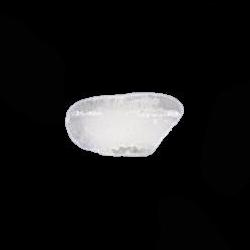

In [10]:
img=Image.open("./data/Rice_Image_Dataset/Arborio/Arborio (7).jpg")
img

In [11]:
img.size

(250, 250)

In [12]:
data=tf.keras.utils.image_dataset_from_directory(
    "./data/Rice_Image_Dataset/",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=75000
)
data

Found 75000 files belonging to 5 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(5),
    layers.Softmax()

    
    
    ])

In [14]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        

In [15]:
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

In [16]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,5)
    print(features.shape,labels.shape)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=50)

(75000, 32, 32, 3) (75000, 5)
Epoch 1/50
1500/1500 [==============================] - 41s 26ms/step - loss: 0.1543 - accuracy: 0.9461
Epoch 2/50
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0840 - accuracy: 0.9705
Epoch 3/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0619 - accuracy: 0.9782
Epoch 4/50
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0400 - accuracy: 0.9865
Epoch 5/50
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0340 - accuracy: 0.9886
Epoch 6/50
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0315 - accuracy: 0.9887
Epoch 7/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0283 - accuracy: 0.9906
Epoch 8/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0258 - accuracy: 0.9914
Epoch 9/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 10/50
1500/1500 [===========

<AxesSubplot: >

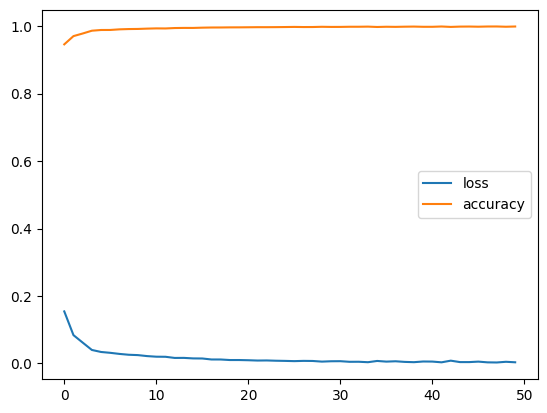

In [17]:
history=pd.DataFrame(record.history)
history.plot()

In [18]:
cnn_model.predict(features)

2344/2344 [==============================] - 14s 6ms/step


array([[5.58246144e-14, 6.00407531e-15, 1.05767546e-20, 1.00000000e+00,
        2.68544153e-25],
       [9.99668002e-01, 4.06852655e-17, 6.39762820e-13, 6.89904210e-12,
        3.32016905e-04],
       [2.58664791e-12, 4.00819413e-21, 2.91266256e-25, 1.78882175e-17,
        1.00000000e+00],
       ...,
       [5.54187341e-32, 6.20216225e-37, 1.00000000e+00, 9.35142773e-26,
        0.00000000e+00],
       [1.47991130e-13, 1.30469475e-21, 2.22221885e-18, 2.27924832e-21,
        1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.75344674e-34,
        0.00000000e+00]], dtype=float32)

In [19]:
model=cnn_model.save("./riceimagecnn.h5",save_format="h5")

In [20]:
model1=tf.keras.models.load_model("./riceimagecnn.h5")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        